# Dog or Cat?

The notebook contains an implementation of a "Dog or Cat" classifier.

The model relies on the Pet Dataset, a collection of over 7,000 images featuring cats and dogs. This model is a fine-tuned version of the pre-trained ResNet model.

In [1]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.2/232.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 18.3 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *

In [3]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [4]:
import os

In [5]:
data = untar_data(URLs.PETS)
path = os.path.join(data, "images")

In [6]:
!du -hs {path}

775M	/root/.fastai/data/oxford-iiit-pet/images


The model relies on the [Oxford-III Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/), a collection of over 7,000 images featuring cats and dogs.

In [7]:
#images with small first letter are dog images
def is_cat(x): return x[0].isupper()

In [8]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(512))

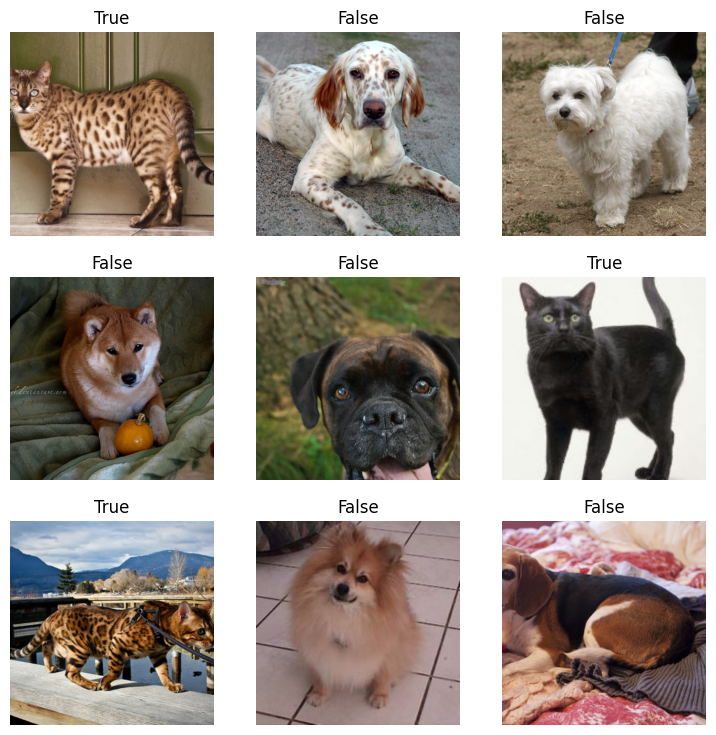

In [9]:
dls.show_batch()

This model is a fine-tuned version of the pre-trained ResNet model.

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.175712,0.037547,0.011502,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.060365,0.055390,0.014885,01:52
1,0.028006,0.009765,0.002706,01:51
2,0.012333,0.006815,0.002706,01:51


In [12]:
!ls

Cat-or-Dog.ipynb  dog-using-laptop-computer.jpg


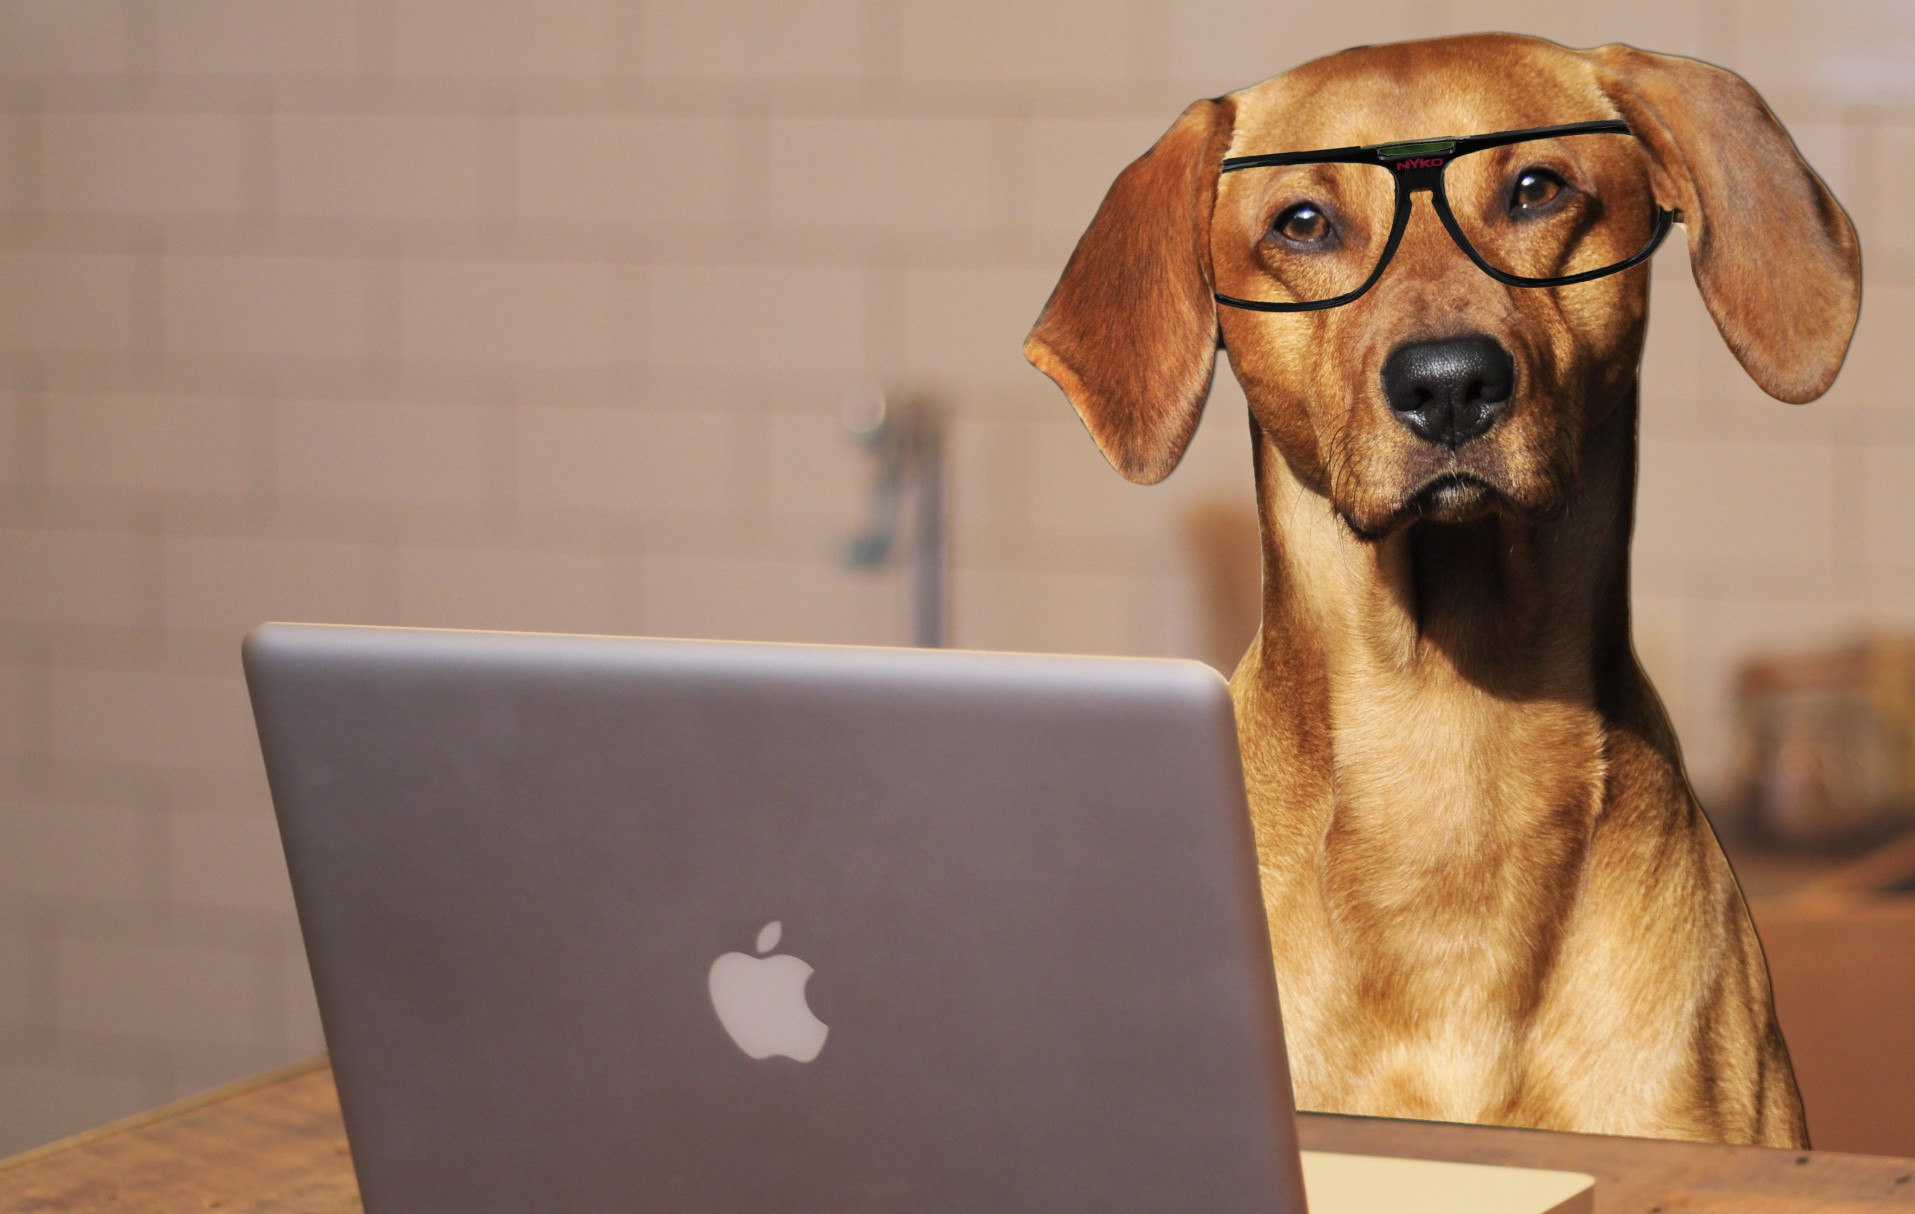

In [14]:
from IPython.display import display, Image
display(Image('dog-using-laptop-computer.jpg'))

In [16]:
result = learn.predict("dog-using-laptop-computer.jpg")
is_cat, _, probs = result
print(f"Is this a cat?: {is_cat}. Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False. Probability it's a cat: 0.000090
